In [81]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_mean_std_shaded

In [82]:
# read csv
data = np.genfromtxt('./results/AR.csv', delimiter=',', skip_header=1, skip_footer=1)

In [83]:
data[:, 0]

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7.])

In [84]:
data.shape

(52, 12)

In [85]:
z = np.mean(data[:][:, 2::2], axis=-1)
z_error = np.std(data[:][:, 2::2], axis=-1) 
# z_error = np.sqrt(np.sum(data[:][:, 3::2]**2, axis=-1) / len(data[:][:, 3::2]))
n = data[:][:, 0]
latent = data[:][:, 1]

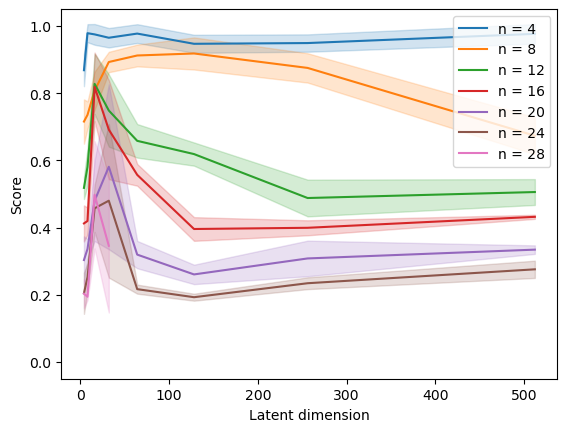

In [86]:
for ind, i in enumerate(np.unique(n).astype(int)):
    plot_mean_std_shaded(latent[n == i], z[n == i], z_error[n == i], color=f'C{ind}', label=f'n = {4 * i}')
    
plt.xlabel('Latent dimension')
plt.ylabel('Score')
plt.ylim(-0.05, 1.05)
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.show()

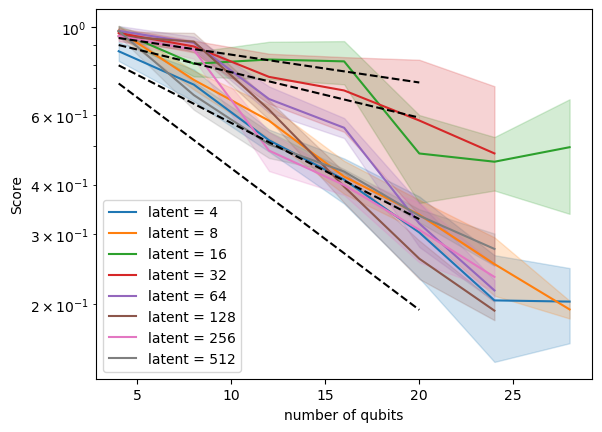

In [80]:
for ind, i in enumerate(np.unique(latent).astype(int)):
    plot_mean_std_shaded(4 * n[latent == i], z[latent == i], z_error[latent == i], color=f'C{ind}', label=f'latent = {i}')
    
plt.plot([4, 20], [15/16, (15/16)**5], 'k--')
plt.plot([4, 20], [0.72, (0.72)**5], 'k--')
plt.plot([4, 20], [0.8, (0.8)**5], 'k--')
plt.plot([4, 20], [0.9, (0.9)**5], 'k--')
    
plt.xlabel('number of qubits')
plt.ylabel('Score')
plt.yscale('log')
plt.legend()
plt.show()

In [8]:
np.exp(np.log(0.6)/20)

0.9747821379701602